<a href="https://colab.research.google.com/github/RachelRamirez/FashionMNIST_DataAugmentation/blob/main/fashion_mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Simple MNIST convnet" Architecture with Extremely Limited Data used to Train CNN

**Original Author as applied to MNIST (Numbers):** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Applied to Fashion MNIST** 2021/08/25

**Description:** A simple convnet that achieves ~90% test accuracy on MNIST, is applied to the Fashion MNIST.

Then data is limited to 1000 training samples to view the effects of data augmentation on increasing model accuracy.

More features are added for residual/error analysis such as confusion matrix and data augmentation.

# Experiment

The first part of this experiment is looking at the space for TrainingSize, ValidationSize, BatchSize, and EpochSize.  These all likely effect one another (40way interactions) so a screening design is used to look for maineffects.

A: BatchSize

B: Epochs

C: Training Size (Count)

D: Validation (as percentage of Training Size)

In [ ]:
## Experiment 1 Variables

var_BatchSize =  10,  100
var_Epochs =     15,  50
var_TrainSize = 100,  1000
var_ValPercent = 0.2, 0.5


 

This is run 1 :  10    15 100 0.2
Results
This is run 2 :  10    15 100 0.5
Results
This is run 3 :  10    15 1000 0.2
Results
This is run 4 :  10    15 1000 0.5
Results
This is run 5 :  10    50 100 0.2
Results
This is run 6 :  10    50 100 0.5
Results
This is run 7 :  10    50 1000 0.2
Results
This is run 8 :  10    50 1000 0.5
Results
This is run 9 :  100    15 100 0.2
Results
This is run 10 :  100    15 100 0.5
Results
This is run 11 :  100    15 1000 0.2
Results
This is run 12 :  100    15 1000 0.5
Results
This is run 13 :  100    50 100 0.2
Results
This is run 14 :  100    50 100 0.5
Results
This is run 15 :  100    50 1000 0.2
Results
This is run 16 :  100    50 1000 0.5
Results


## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train[0:100]
y_train = y_train[0:100]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (100, 28, 28, 1)
100 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

## Train the model

In [40]:
counter = 1
for i in var_BatchSize:
  for j in var_Epochs:
     for k in var_TrainSize:
       for l in var_ValPercent:
         print("This is run", counter, ": ", i, "  ", j, k, l)
         counter=counter+1
         batch_size = var_BatchSize
         epochs = var_Epochs

         model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

         model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.7, verbose=0)

NameError: ignored

In [32]:
# batch_size = 50
# epochs = 30

# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.5)

Epoch 1/30
1/1 [==============================] - 1s 594ms/step - loss: 0.1392 - accuracy: 0.9800 - val_loss: 0.7408 - val_accuracy: 0.7200
Epoch 2/30
1/1 [==============================] - 0s 70ms/step - loss: 0.1347 - accuracy: 1.0000 - val_loss: 0.7687 - val_accuracy: 0.7000
Epoch 3/30
1/1 [==============================] - 0s 68ms/step - loss: 0.1575 - accuracy: 0.9800 - val_loss: 0.7568 - val_accuracy: 0.7000
Epoch 4/30
1/1 [==============================] - 0s 69ms/step - loss: 0.1995 - accuracy: 0.9400 - val_loss: 0.7431 - val_accuracy: 0.7600
Epoch 5/30
1/1 [==============================] - 0s 71ms/step - loss: 0.2573 - accuracy: 0.9000 - val_loss: 0.7460 - val_accuracy: 0.7800
Epoch 6/30
1/1 [==============================] - 0s 80ms/step - loss: 0.1449 - accuracy: 0.9600 - val_loss: 0.7655 - val_accuracy: 0.7800
Epoch 7/30
1/1 [==============================] - 0s 73ms/step - loss: 0.1892 - accuracy: 0.9200 - val_loss: 0.7923 - val_accuracy: 0.7800
Epoch 8/30
1/1 [==========

## Evaluate the trained model

In [34]:
          score = model.evaluate(x_test, y_test, verbose=1)
          print("Test loss:", score[0])
          print("Test accuracy:", score[1])

Test loss: 0.912209689617157
Test accuracy: 0.6866999864578247


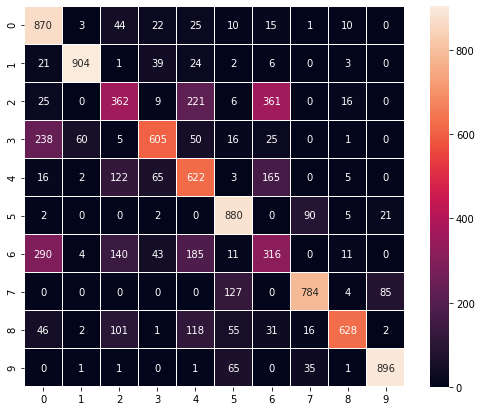

In [31]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
 
y_test = np.argmax(y_test, axis=1) 

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)  #First Variable is on VERTICAL, second Variable is on X HORIZONTAL
#confusion_matrix = tf.math.confusion_matrix(predictions, tf.Variable(np.ones(predictions.shape)))

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


In my first run, no data augmentation, 100 random samples of the Training Set, using 50% of that as the Validation Set, using a Batch Size of 50 and Epochs = 30, the resulting accuracy of the test-set is Test loss: 0.912209689617157
Test accuracy: 0.6866999864578247

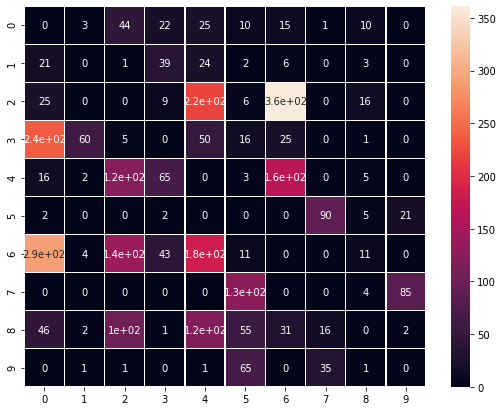

array([6, 3, 6, 4, 2, 7, 2, 5, 2, 7])

array([2, 3, 6, 0, 6, 7, 0, 5, 4, 5])

In [7]:
## I want to pick the largest value on the confusion matrix not on the diagonal
confusing_part_matrix= np.array(confusion_matrix)-np.identity(confusion_matrix.shape[0])*np.diag(confusion_matrix)

confusing_part_matrix = tf.convert_to_tensor(confusing_part_matrix)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusing_part_matrix,
    annot=True,
    linewidths=.5
    #,fmt="d"
    #,square=True
    #,ax=ax
)
plt.show()


## find the max value of those remaining numbers
thisnumber=np.max(confusing_part_matrix)

x_thisnumber=np.argmax(confusing_part_matrix,axis=0)
y_thisnumber=np.argmax(confusing_part_matrix,axis=1)
z_thisnumber=np.argmax(confusing_part_matrix)
display(x_thisnumber,y_thisnumber)
#print("The worst the algorithm did is between " confus)
 

In [8]:
confusing_part_matrix[0]

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 0.,  3., 44., 22., 25., 10., 15.,  1., 10.,  0.])>

In [38]:
z_thisnumber=np.argmax(confusing_part_matrix)
z_thisnumber
print("So the most confused classes were between: " , np.math.floor(z_thisnumber/10), " a",  LABEL_NAMES[np.math.floor(z_thisnumber/10)] , " and  ", z_thisnumber%10, " a ",  
LABEL_NAMES[z_thisnumber%10])



So the most confused classes were between:  2  a pullover  and   6  a  shirt


In [23]:

LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

delta = predictions - y_test

wrong = tf.boolean_mask(predictions, delta)
print(wrong)

#  if i != 0
#    display("Prediction ", i, " is " + LABEL_NAMES[predictions[i]], "but it is ",  LABEL_NAMES[y_test[i] )


tf.Tensor([5 6 6 ... 4 6 0], shape=(3133,), dtype=int64)


In [ ]:
plt.imshow(x_test[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()